In [3]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt

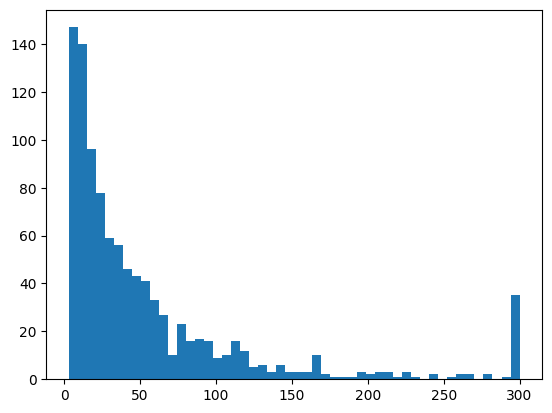

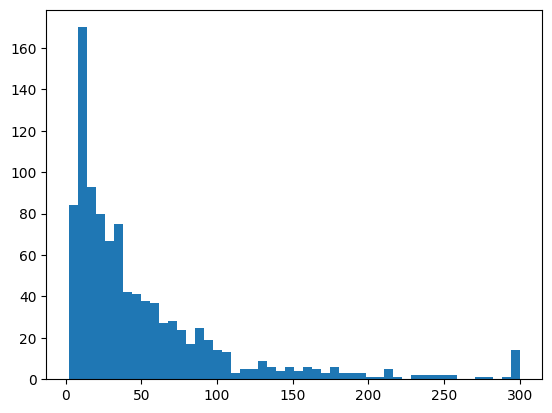

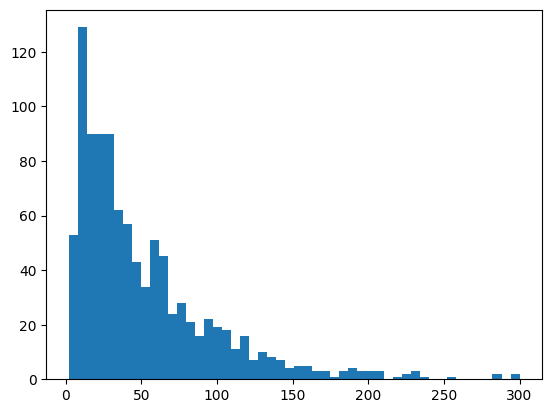

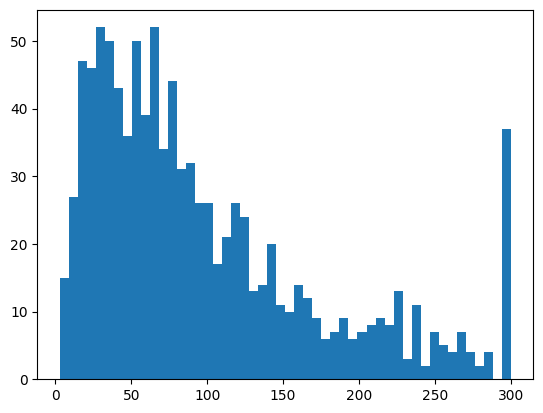

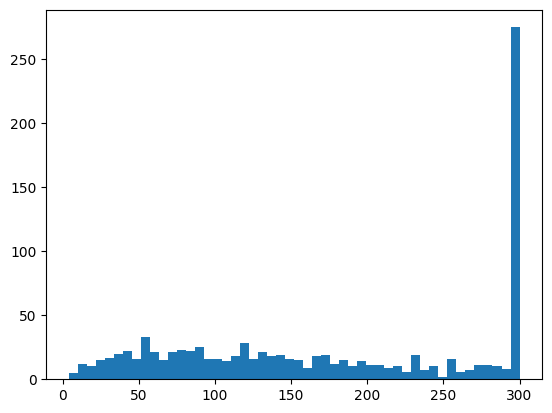

In [2]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd

class CommandRunner:
    def __init__(self, path, num_runs):
        self.ps = [0, 0.1, 0.4, 0.8, 1]
        self.commands = [f"./gsat2 -r time -p {p} {path}" for p in self.ps]
        self.num_runs = num_runs

    def run_command(self, cmd):
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        first_line = result.stderr
        return list(map(int, first_line.split()[:4]))

    def run(self):
        for cmd, p in zip(self.commands, self.ps):
            data = []
            for _ in range(self.num_runs):
                result = self.run_command(cmd)
                data.append(result)
            
            result_df = pd.DataFrame(data, columns=['Tries', 'MaxTries', 'C', 'TotalC'])
            result_df.to_csv(f"results/{cmd.split('/')[-1]}{p}.csv")
            
            plt.hist(result_df["Tries"], bins=50)
            plt.show()
            plt.close()

runner = CommandRunner(path='uf20-91/uf20-01.cnf', num_runs=1000)
runner.run()

In [5]:
df = pd.read_csv("gsat201-gsat204-91.csdata", sep=";")

In [6]:
df.head(10)

,inst,succ A,succ B,of,steps A,steps B,awg fined A,awg fined B,mu A,sig^2 A,mu B,sig^2 B,xing,winner
0,uf20-01,921,996,1000,166.890,93.062,522.390,111.062,3.98601,1.58428,4.07483,0.953492,27,B
1,uf20-010,887,996,1000,158.190,82.727,666.690,100.727,3.57911,1.67836,3.89230,1.056360,22,B
2,uf20-0100,951,998,1000,142.365,85.059,362.865,94.059,4.12702,1.18450,4.08394,0.755052,28,B
3,uf20-01000,657,918,1000,292.419,198.197,1835.920,567.197,3.09491,2.64426,4.37498,1.021660,42,B
4,uf20-0101,875,986,1000,207.636,121.524,770.136,184.524,4.07212,1.39186,4.35080,0.777620,34,B
5,uf20-0102,669,934,1000,290.028,178.110,1779.530,475.110,3.16539,2.61447,4.35797,0.994221,28,B
6,uf20-0103,613,860,1000,310.768,218.270,2052.270,848.270,2.95736,2.88949,4.10416,1.211550,24,B
7,uf20-0104,831,990,1000,146.105,86.163,906.605,131.163,2.87144,1.61317,3.69818,1.333250,33,B
8,uf20-0105,502,785,1000,338.328,252.860,2579.330,1220.360,2.36676,3.40898,3.80276,1.621840,34,B
9,uf20-0106,533,833,1000,339.341,240.437,2440.840,991.937,2.57427,3.39417,4.08139,1.283480,42,B


In [25]:
(df["winner"] == "B").sum()/len(df)

0.999

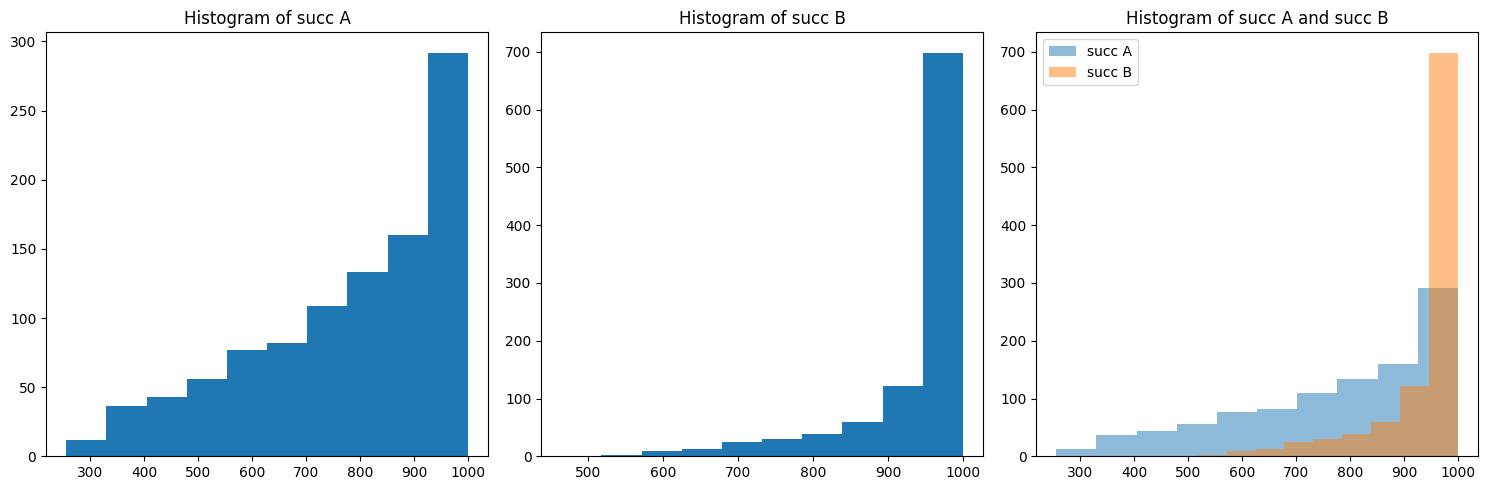

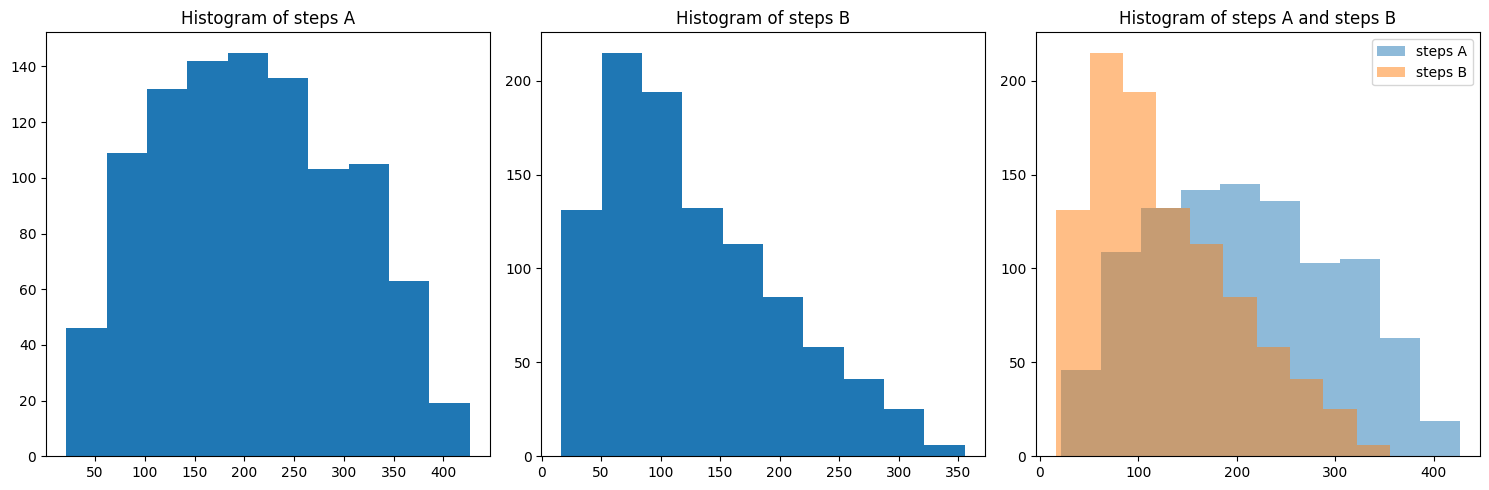

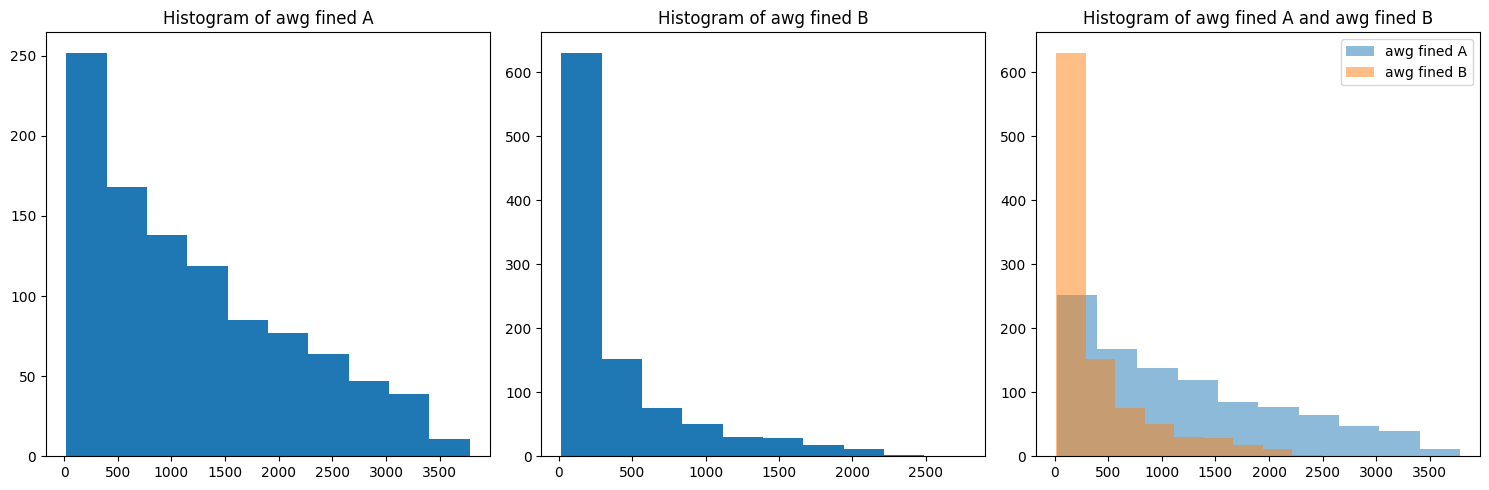

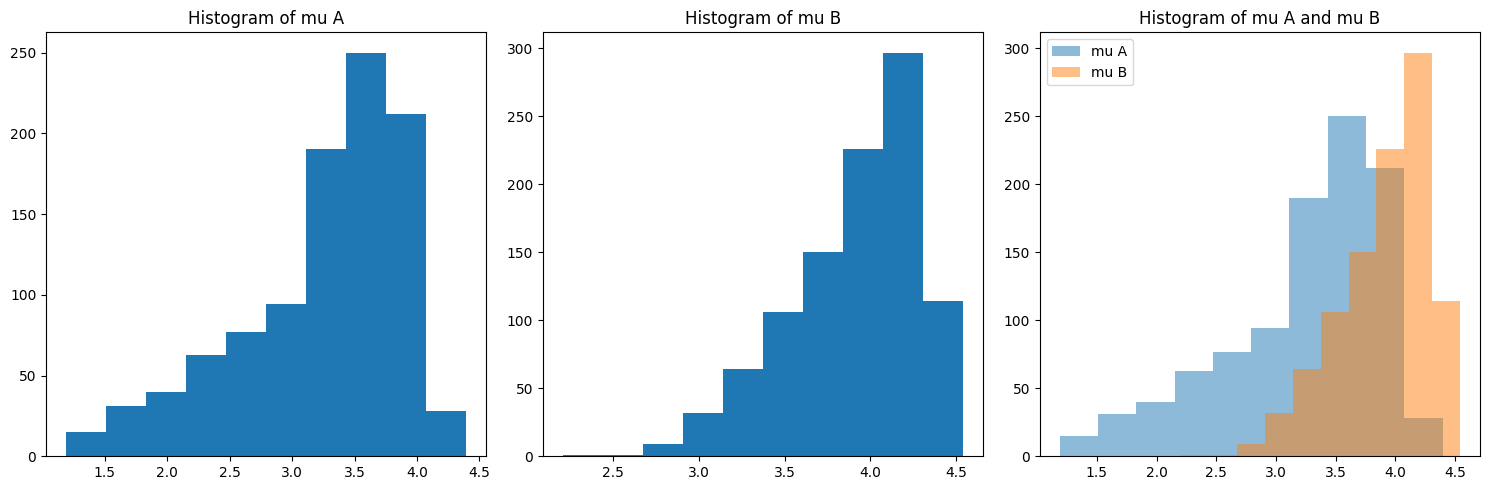

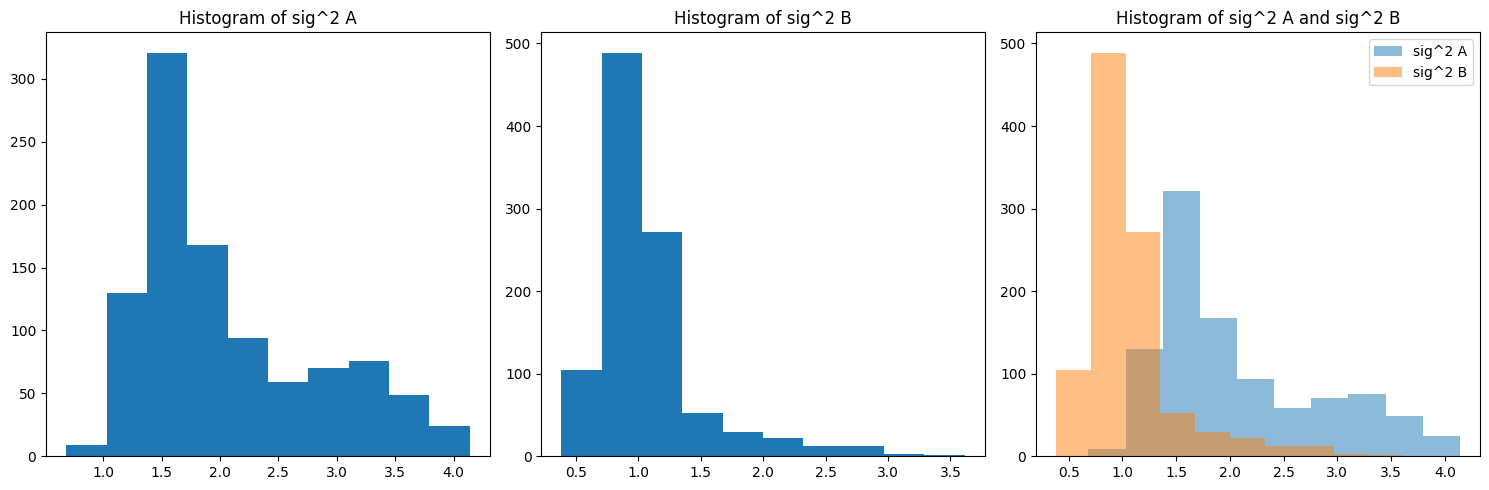

In [21]:
import matplotlib.pyplot as plt

def plot_columns_hist(df, col1, col2):

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].hist(df[col1])
    ax[0].set_title(f"Histogram of {col1}")

    ax[1].hist(df[col2])
    ax[1].set_title(f"Histogram of {col2}")

    ax[2].hist(df[col1], alpha=0.5, label=col1) 
    ax[2].hist(df[col2], alpha=0.5, label=col2) 
    ax[2].set_title(f"Histogram of {col1} and {col2}")
    ax[2].legend()

    plt.tight_layout()
    plt.show()

plot_columns_hist(df, "succ A", "succ B")
plot_columns_hist(df, "steps A", "steps B")
plot_columns_hist(df, "awg fined A", "awg fined B")
plot_columns_hist(df, "mu A", "mu B")
plot_columns_hist(df, "sig^2 A", "sig^2 B")


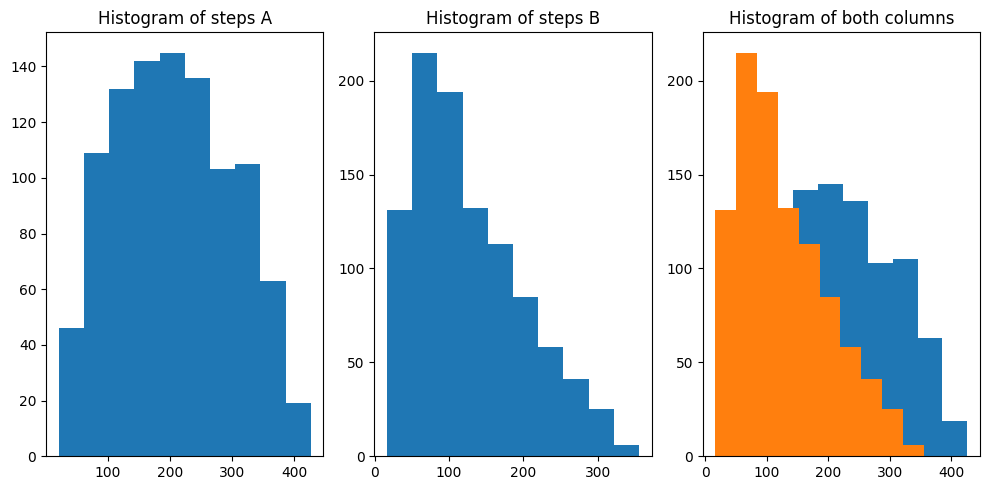

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].hist(df["steps A"])
ax[0].set_title("Histogram of steps A")

ax[1].hist(df["steps B"])
ax[1].set_title("Histogram of steps B")

ax[2].hist(df["steps A"])
ax[2].hist(df["steps B"])
ax[2].set_title("Histogram of both columns")

plt.tight_layout()
plt.show()


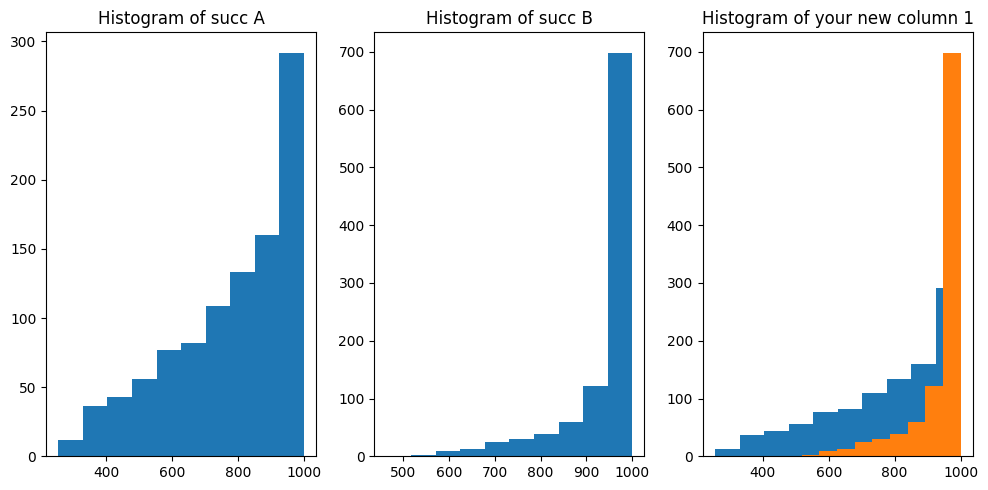

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].hist(df["succ A"])
ax[0].set_title("Histogram of succ A")

ax[1].hist(df["succ B"])
ax[1].set_title("Histogram of succ B")

ax[2].hist(df["succ A"]) 
ax[2].hist(df["succ B"]) 
ax[2].set_title("Histogram of your new column 1")

plt.tight_layout()
plt.show()
